<a href="https://colab.research.google.com/github/RachmaAyudyaw/MachineLearningDicodingGoogleResearchCollab/blob/main/Proyek1_MembuatModelNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('Emotion_final.csv')
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
category=pd.get_dummies(df.Emotion)
df_baru=pd.concat([df,category],axis=1)
df_baru=df_baru.drop(columns='Emotion')
df_baru

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [ ]:
text=df_baru['Text'].values
label=df_baru[['anger','fear','happy','love','sadness','surprise']].values

In [ ]:
from sklearn.model_selection import train_test_split
text_latih,text_test,label_latih,label_test=train_test_split(text,label,test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(num_words=5000,oov_token='x')
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

sequences_latih=tokenizer.texts_to_sequences(text_latih)
sequences_test=tokenizer.texts_to_sequences(text_test)

padded_latih=pad_sequences(sequences_latih)
padded_test=pad_sequences(sequences_test)

In [ ]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(input_dim=5000,output_dim=16),
                           tf.keras.layers.LSTM(64),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai > 90%!")
      self.model.stop_training=True
callbacks=myCallback()

In [ ]:
num_epochs=50
history=model.fit(padded_latih, 
                  label_latih, 
                  epochs=num_epochs,
                  callbacks=[callbacks],
                  validation_data=(padded_test,label_test),
                  verbose=2)

Epoch 1/50
537/537 - 23s - loss: 1.3905 - accuracy: 0.3710 - val_loss: 1.1935 - val_accuracy: 0.4445
Epoch 2/50
537/537 - 20s - loss: 0.9427 - accuracy: 0.5865 - val_loss: 0.8132 - val_accuracy: 0.7307
Epoch 3/50
537/537 - 20s - loss: 0.5390 - accuracy: 0.8221 - val_loss: 0.5588 - val_accuracy: 0.8246
Epoch 4/50
537/537 - 20s - loss: 0.3677 - accuracy: 0.8743 - val_loss: 0.4713 - val_accuracy: 0.8497
Epoch 5/50
537/537 - 20s - loss: 0.2570 - accuracy: 0.9109 - val_loss: 0.4186 - val_accuracy: 0.8667

Akurasi telah mencapai > 90%!


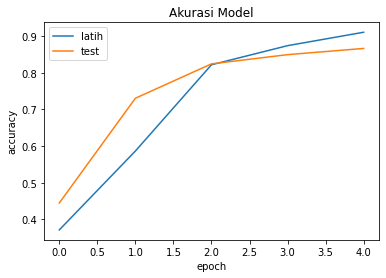

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['latih','test'],loc='upper left')
plt.show()

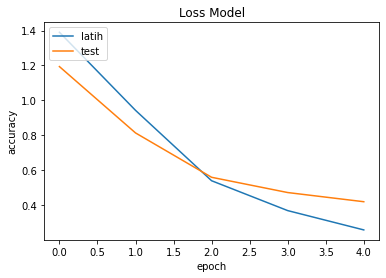

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['latih','test'],loc='upper left')
plt.show()